<a href="https://colab.research.google.com/github/Caffeine-Coders/Sentiment-Analysis-Project/blob/main/backend/personanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 98.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.2 MB/s eta 0:00:00


In [8]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModelForSeq2SeqLM
from transformers import TFAutoModelForSequenceClassification

# model 0
tokenizer = AutoTokenizer.from_pretrained("AK776161/birdseye_roberta-base-18", use_fast = True)
model = AutoModelForSequenceClassification.from_pretrained("AK776161/birdseye_roberta-base-18", from_tf=True)
# model1 
tokenizer1 = AutoTokenizer.from_pretrained("AK776161/birdseye_roberta-base-tweet-eval", use_fast = True)
model1 = AutoModelForSequenceClassification.from_pretrained("AK776161/birdseye_roberta-base-tweet-eval",from_tf=True)

All TF 2.0 model weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.


All TF 2.0 model weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.


In [9]:
import pandas as pd
import numpy as np

In [10]:
def nparraymeancalc(arr1, arr2):
  returner = []
  for i in range(0,len(arr1)):
    if(arr1[i][1] < -7):
      arr1[i][1] = 0
    returner.append(np.mean([arr1[i],arr2[i]], axis = 0))
    
  return np.array(returner)

In [ ]:
#test for the method
arr1 = np.array([[1,2,3]])
arr2 = np.array([[1,2,3]])
retruner = nparraymeancalc(arr1, arr2)
print(retruner)

[[1. 2. 3.]]


In [11]:
import tensorflow

def predictions(tokenizedtext):
  output1 = model(**tokenizedtext)
  output2 = model1(**tokenizedtext)

  logits1 = output1.logits
  logits1 = logits1.detach().numpy()

  logits2 = output2.logits
  logits2 = logits2.detach().numpy()
  
  # print(logits1, logits2)
  predictionresult = nparraymeancalc(logits1,logits2)

  return np.array(predictionresult)



In [12]:
def labelassign(predictionresult):
  labels = []
  for i in predictionresult:
    label_id = i.argmax()
    labels.append(label_id)
  return labels


In [ ]:
print("index: " , labelassign(np.array([[1,2,3]])))

index:  [2]


In [13]:
def percentagecalc(labels):
  percentages = []
  label1 = 0
  label2 = 1
  label3 = 2

  percentages.append((labels.count(label1)/len(labels))*100)
  percentages.append((labels.count(label2)/len(labels))*100)
  percentages.append((labels.count(label3)/len(labels))*100)

  return percentages

In [14]:
import matplotlib.pyplot as plt
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
# Game starts

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/Dhoni.csv')
data = data['text']
data.fillna(" ")
print(data)

0       I interacted with him as a commentator &amp; a...
1       "I don't see myself travelling for cricket aga...
2       You will never retire from our hearts!\n\n#Aug...
3       From winning trophies 🏆 to winning people's he...
4       There's no limit to the creativity of some of ...
                              ...                        
7495    Still remember d day when I read the paper tha...
7496    World-class player and brilliant captain! We'l...
7497    Yet @sonamakapoor couldn’t wish Happy Independ...
7498    .@msdhoni and @ImRaina retired from internatio...
7499    Thats it with the cricket. Last of my fav cric...
Name: text, Length: 7500, dtype: object


In [ ]:
tokenizeddata_dhoni = tokenizer.batch_encode_plus(list(data[:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_dhoni)


In [ ]:
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_dhoni = tokenizer.batch_encode_plus(list(data[201:420]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_dhoni)

In [ ]:
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_dhoni = tokenizer.batch_encode_plus(list(data[421:610]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_dhoni)

In [ ]:
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_dhoni = tokenizer.batch_encode_plus(list(data[7199:7399]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_dhoni)

In [ ]:
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_dhoni = tokenizer.batch_encode_plus(list(data[7399:]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_dhoni)

In [ ]:
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
print(result)

[11.36080319 33.94396904 54.69522777]


In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

NameError: ignored

In [ ]:
#virat

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/kohli.csv')
data = data['tweet']
data.fillna(" ")
print(data)

0        Most runs for India since 2020:  2265 - Virat ...
1                                           Strong Kohli 💪
2                                @Kohli_Spy @BCCI em ledhu
3        Monty Panesar on why BCCI can't afford to 'dro...
4        Babar’s message to Kohli, what did Irfan Patha...
                               ...                        
19996    @CricCrazyJohns Sala kohli ke aate hi team ki ...
19997    @mufaddal_vohra Remove batting coach Vikramsin...
19998    Virat Kohli’s innings in the ongoing England v...
19999                       @kohlifan100 @imVkohli Copy +1
20000    Fans ki unna interest lo sagam kuda ledu niku ...
Name: tweet, Length: 20001, dtype: object


<ipython-input-32-2007d59bbc65>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/kohli.csv')


In [ ]:
tokenizeddata_virat = tokenizer.batch_encode_plus(list(data[:100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_virat)

In [ ]:
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_virat = tokenizer.batch_encode_plus(list(data[100:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_virat)

In [ ]:
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_virat = tokenizer.batch_encode_plus(list(data[14000:14100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_virat)

In [ ]:
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_virat = tokenizer.batch_encode_plus(list(data[200:300]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_virat)

In [ ]:
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_virat = tokenizer.batch_encode_plus(list(data[400:500]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_virat)

In [ ]:
percentage5 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_virat = tokenizer.batch_encode_plus(list(data[19900:]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_virat)

In [ ]:
percentage6 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
result = np.mean([result,np.array(percentage6)], axis = 0)
print(result)

[13.47834158 31.92048267 54.60117574]


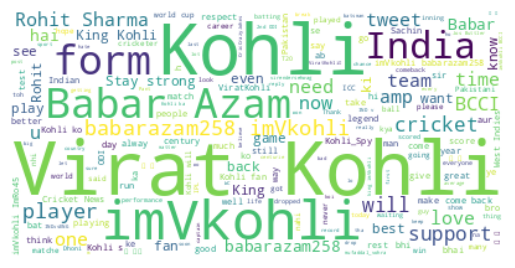

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#trump

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/trump_insults.csv')
data = data['tweet']
data.fillna(" ")
print(data)

0        Can you believe this fool, Dr. Thomas Frieden ...
1        Can you believe this fool, Dr. Thomas Frieden ...
2        Big time in U.S. today - MAKE AMERICA GREAT AG...
3        Politician @SenatorCardin didn't like that I s...
4        For the nonbeliever, here is a photo of @Neily...
                               ...                        
10355    If Vice President @Mike_Pence comes through fo...
10356    States want to correct their votes, which they...
10357    They just happened to find 50,000 ballots late...
10358    The States want to redo their votes. They foun...
10359    Sleepy Eyes Chuck Todd is so happy with the fa...
Name: tweet, Length: 10360, dtype: object


In [ ]:
tokenizeddata_trump = tokenizer.batch_encode_plus(list(data[:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_trump)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_trump = tokenizer.batch_encode_plus(list(data[200:400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_trump)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_trump = tokenizer.batch_encode_plus(list(data[400:600]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_trump)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_trump = tokenizer.batch_encode_plus(list(data[10100:10300]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_trump)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_trump = tokenizer.batch_encode_plus(list(data[9900:10100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_trump)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
print(result)

[39.     25.1875 35.8125]


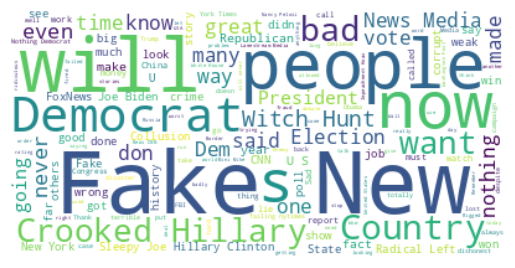

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#amber

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/Amber.csv')
data = data['text']
data.fillna(" ")
print(data)

0        @juliedawnspears @jtmbls @nearlydear No, I mea...
1        As someone with a bit of experience in psychol...
2        Court told Amber Heard ‘wanted to add more det...
3        ACLU helped draft article at heart of Depp v H...
4        Marilyn Manson is now suing Evan Rachel Wood f...
                               ...                        
25370    amber heard is that you shopping my Instacart ...
25371    @RollingStone This is ridiculous. Amber Heard ...
25372    The ACLU’s turn away from prioritizing speech ...
25373    What if I told you both Amber Heard AND Johnny...
25374    How can Amber Heard lie like that???? Like she...
Name: text, Length: 25375, dtype: object


<ipython-input-45-dc0067214bb6>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/Amber.csv')


In [ ]:
tokenizeddata_amber = tokenizer.batch_encode_plus(list(data[:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_amber)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_amber = tokenizer.batch_encode_plus(list(data[200:400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_amber)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_amber = tokenizer.batch_encode_plus(list(data[400:600]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_amber)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_amber = tokenizer.batch_encode_plus(list(data[10000:10200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_amber)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_amber = tokenizer.batch_encode_plus(list(data[25174:]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_amber)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
print(result)

[35.67179726 38.1329291  26.19527363]


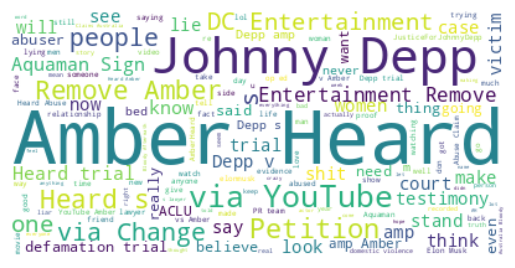

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Depp

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/Depp.csv')
data = data['text']
data.fillna(" ")
print(data)

0        ACLU helped draft article at heart of Depp v H...
1        Johnny Depp's security guard says he paid a ho...
2        Luka Doncic is incredible at basketball for ha...
3        @ThisIsMax She hasn’t donated a single dime. J...
4        Johnny Depp movie-a-thon starting NOW! 🍿🍿\n\nS...
                               ...                        
24699    Disbelieving Amber Heard leads to traumatizing...
24700    I kind of like the Sleepy Hollow movie that sh...
24701    I have to say I'm totally for Johnny Depp but ...
24702    The Place I’m eating at has a Johnny Depp and ...
24703    Johnny Depp NOT Dating His Female Attorney, De...
Name: text, Length: 24704, dtype: object


<ipython-input-8-6b3b4bf78ffc>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/Depp.csv')


In [ ]:
tokenizeddata_depp = tokenizer.batch_encode_plus(list(data[:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_depp)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_depp = tokenizer.batch_encode_plus(list(data[200:400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_depp)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_depp = tokenizer.batch_encode_plus(list(data[400:600]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_depp)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_depp = tokenizer.batch_encode_plus(list(data[24503:]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_depp)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_depp = tokenizer.batch_encode_plus(list(data[10000:10200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata_depp)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
print(result)

[32.1795709  36.88961443 30.93081468]


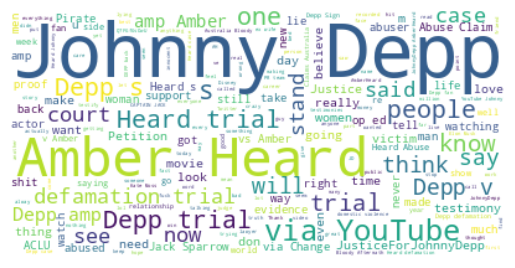

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#edlee

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/BillGates.csv')
data = data['text']
data.fillna(" ")
print(data)

0       Tanzania hopes to eliminate one of the world’s...
1       By investing in R&amp;D, I know we can discove...
2       This unusual tool for fighting disease turns o...
3       My first trip to Africa with Melinda was the c...
4       “The death that didn’t happen is not visible."...
                              ...                        
2082    Malaria eradication is an ambitious, long-term...
2083    For those of us lucky enough to get to work wi...
2084    Melinda and I extend our sincere condolences t...
2085    The crisis in Somalia has claimed 30,000 child...
2086    Nigeria has made phenomenal progress toward er...
Name: text, Length: 2087, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata_depp = tokenizer.batch_encode_plus(list(data[200:400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[400:600]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[600:800]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[1886:]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
print(result)

[ 5.55006219 18.08146766 76.36847015]


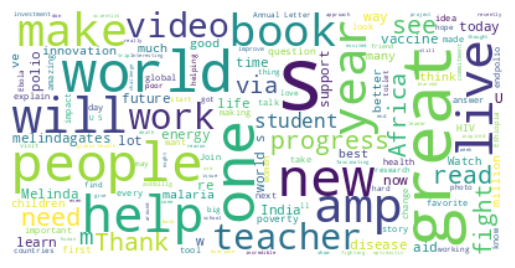

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#edlee

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/EdLee.csv')
data = data['text']
data.fillna(" ")
print(data)

0       Thank you to all the dedicated City employees ...
1       .@JeffSheehySF and I took to the streets of Ca...
2       @JanetLamkin @united With fewer than 5% of wom...
3       Congrats @JanetLamkin for stepping into the 🛫 ...
4       With rain ☔️ in the forecast for this evening,...
                              ...                        
2442    Bet fulfilled! Thank you Mayor Sly James for h...
2443    Mayors who have raised the #MinimumWage includ...
2444    Inspired by words of The Hon. @HillaryClinton ...
2445    Made it across GGB with mayors including Mayor...
2446    What an amazing way to celebrate our storied C...
Name: text, Length: 2447, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[200:400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[400:600]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[600:800]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[800:1000]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
print(result)

[ 4.8125  14.46875 80.71875]


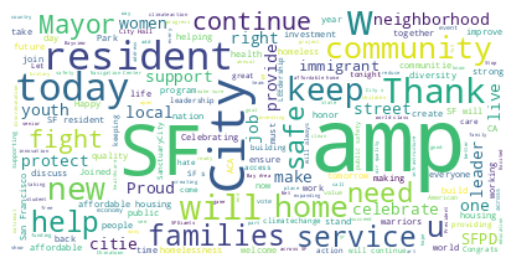

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#ElonMusk

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/ElonMusk.csv')
data = data['text']
data.fillna(" ")
print(data)

0       "If one day, my words are against science, cho...
1       I placed the flowers\r\n\r\nThree broken ribs\...
2               Atatürk Anıtkabir https://t.co/al3wt0njr6
3              @Bob_Richards One rocket, slightly toasted
4       @uncover007 500 ft so far. Should be 2 miles l...
                              ...                        
2673    Testing separation of F9 rocket fairing (can h...
2674    Sharing a metaphysical milkshake with @RainnWi...
2675              @JBSiegelMD Cool, I'm glad you like it!
2676    Craig Venter talks about flu vaccines and the ...
2677    Using Über to order a Tesla Model S @SXSW with...
Name: text, Length: 2678, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[200:400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[400:600]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[600:800]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[800:1000]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
print(result)

[17.9375 36.9375 45.125 ]


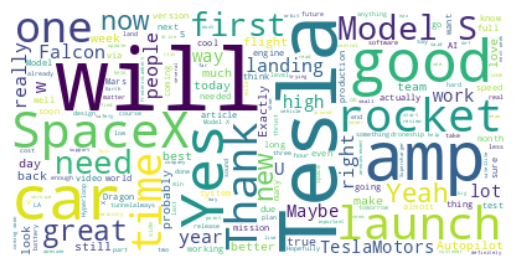

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hilary vs trump

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/Hilary-Trump.csv')
data = data['text']
data.fillna(" ")
print(data)

0       The question in this election: Who can put the...
1       Last night, Donald Trump said not paying taxes...
2       Couldn't be more proud of @HillaryClinton. Her...
3       If we stand together, there's nothing we can't...
4       Both candidates were asked about how they'd co...
                              ...                        
6439    "@lilredfrmkokomo: @realDonaldTrump My Faceboo...
6440    "@marybnall01: @realDonaldTrump watched lowell...
6441    "@ghosthunter_lol: Iowa key endorsement for @r...
6442    "@iLoveiDevices: @EdwinRo47796972 @happyjack22...
6443    "@SalRiccobono: @realDonaldTrump @troyconway D...
Name: text, Length: 6444, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[200:400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[400:600]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[600:800]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[800:1000]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
print(result)

[23.5625 33.0625 43.375 ]


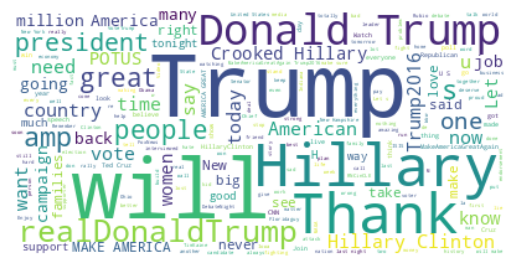

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#meghan

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/Meghan.csv')
data = data['Tweet']
data.fillna(" ")
print(data)

0        @RoyalFamily @ClarenceHouse @KensingtonRoyal\n...
1        Listen to my latest podcast episode, entitled ...
2        #MeghanMarkle is salty AF 'cause her #moonbump...
3        #meghanmarkle didn’t know anything about the B...
4        #RoyalFamily \n#MeghanandHarryonOprah \n#Oprah...
                               ...                        
52815    Royals News: Prince Harry And Meghan Markle Lo...
52816    Well the public deserve to know #BuckinghamPal...
52817    @benshapiro #meghanmarkle is invading my priva...
52818    Untangling the Provenance of #MeghanMarkle’s C...
52819    #MeghanMarkle We are not buying what you're se...
Name: Tweet, Length: 52820, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[200:400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[400:600]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[600:800]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[800:1000]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
print(result)

[23.40625 39.1875  37.40625]


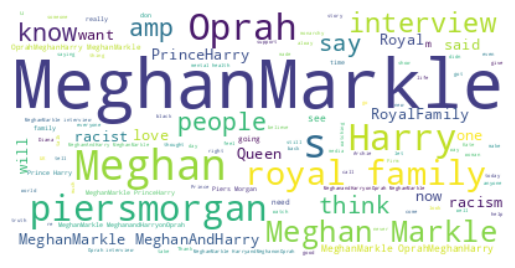

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#oprah

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/Oprah.csv')
data = data['content']
data.fillna(" ")
print(data)

0        @ ava you sure made us wait long enough  # Nov...
1                    @ava You sure made us waitling enough
2        @ava so great bringing Glynn Thurman back.  Sw...
3                @theSheenaB 90 min episode tonight y’all!
4        “All  I do is regard you Darla”. I think Ralph...
                               ...                        
12064                    george thats a promo not a tweet.
12065                 little jordan is next. love this kid
12066    hi everyone. sadie's great. gets her rabies va...
12067                      hi jimmy order a reuben for me.
12068    HI TWITTERS . THANK YOU FOR A WARM WELCOME. FE...
Name: content, Length: 12069, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[200:400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[400:600]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[600:800]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[800:1000]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
print(result)

[ 6.5  17.75 75.75]


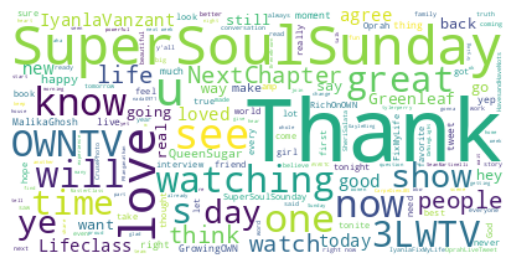

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Trail-Jhonny vs Amber

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/Trail.csv')
data = data['text']
data.fillna(" ")
print(data)

0        @ThisIsMax She hasn’t donated a single dime. J...
1        @ChaseOM @viallnicholas28 The EVIDENCE proves,...
2        The Depp/Heard trial is officially like the en...
3        Can we get a petition going to get Johnny Depp...
4        Well, hells bells I spelled Johnny Depp’s ex w...
                               ...                        
18318    Liked on YouTube: What's the Johnny Depp / Amb...
18319    Liked on YouTube: What's the Johnny Depp / Amb...
18320    @SiegfriedKnight @HueReddish @clearbrightfame ...
18321    Johnny's EX Jennifer Grey says his court battl...
18322    “Some people have accused Heard of acting duri...
Name: text, Length: 18323, dtype: object


<ipython-input-69-1e717cef390e>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/Trail.csv')


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[200:400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[400:600]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[600:800]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[800:1000]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
print(result)

[25.      48.15625 26.84375]


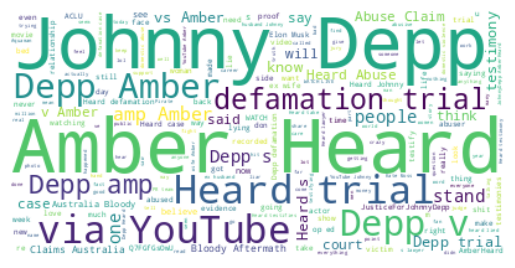

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#jimmy

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/jimmy.csv')
data = data['content']
data.fillna(" ")
print(data)

0        It’s officially 5 More Sleeps ‘til Christmas!!...
1        Catch @JKCorden and I taking a walk down winte...
2        Happy holidays!! Here’s a special reading of 5...
3        Thanks to our partner @FordMustang, I got to r...
4        Only the genius, creative team at @fallontonig...
                               ...                        
12447    @dudetodad remember that 80's sitcom my dude d...
12448                           @qoolquest Me twitter now.
12449    hey. psyched that people liked the show yester...
12450               is ready to launch the show on Monday!
12451                            is listening to music :-)
Name: content, Length: 12452, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[200:400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[400:600]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[600:800]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[800:1000]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
print(result)

[11.15625 29.53125 59.3125 ]


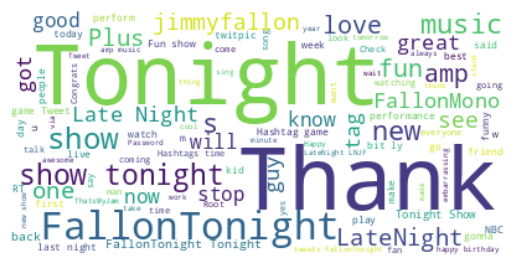

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#kejri


check


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/kejri.csv')
data = data['Tweet']
data.fillna(" ")
print(data)

0        @TajinderBagga Aap leaders are speaking agains...
1        Bjp Aap se sikh rhi h\nNarendra Modi Manish Si...
2                            @JaikyYadav16 Arvind kejriwal
3        Arvind Kejriwal As PM Visits Gujarat School ht...
4        Arvind Kejriwal's stand against rape is very c...
                               ...                        
69995    @BhagwantMann Why giving security to arvind ke...
69996    @aajtak @sambitswaraj Oye bc saleya moosewala ...
69997                  #Arvind_Kejriwal_should_be_arrested
69998    #BREAKING | Sidhu Moosewala dead: BJP holds Ar...
69999    @DChaurasia2312 Dr Kumar Vishwas, former found...
Name: Tweet, Length: 70000, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[:100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
# result = np.mean([np.array(percentage1)], axis = 0)
print(percentage1)

[9.0, 32.0, 59.0]


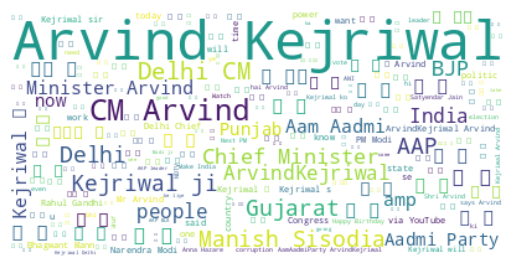

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#modi

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/modi.csv')
data = data['tweet']
data.fillna(" ")
print(data)

0        Unprecedented enthusiasm in Kolkata! Bond betw...
1        The mood in Siliguri is clear- people want BJP...
2        Happy to be back in Arunachal Pradesh. Watch l...
3        In Bihar and Odisha, it is NDA all the way.   ...
4        पुन्हा एकदा महाराष्ट्रात येतोय् ! गोंदिया येथे...
                               ...                        
19578    Narendrabhai Modi: Through water conservation ...
19579    Women would play a crucial role in the develop...
19580    Most awaited gujarati version of www.narendram...
19581    An inspiring address to Scouts & Guides in Jam...
19582    2nd Feb, I will be in Dahod for Gujarat Swarni...
Name: tweet, Length: 19583, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[:50]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[50:100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
print(result)

[ 3. 42. 55.]


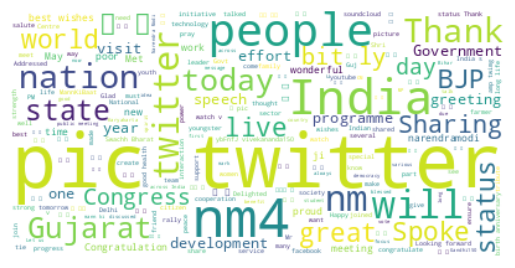

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#modi2

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/modi2.csv')
data = data['Tweet']
data.fillna(" ")
print(data)

0                              Is Narendra Modi a toaster?
1        5G About To Bring Major Change, Will Revolutio...
2        Prime Minister Shri Narendra Modi along with H...
3        Bharat Mata has waited 5000 years for a true s...
4        How Narendra Modi’s game-changing Gati Shakti ...
                               ...                        
69995    माननीय प्रधानमंत्री आदरणीय श्री Narendra Modi ...
69996    A specially customised Indian aircraft has rea...
69997    Watch: Prime Minister Narendra Modi's remarks ...
69998    8 Namibian cheetahs coming to India on PM Nare...
69999    Special plane lands in Namibia to get African ...
Name: Tweet, Length: 70000, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[:100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[200:250]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[300:350]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
print(result)

[ 3.5  36.75 59.75]


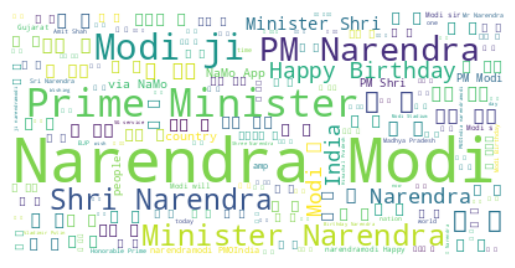

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#obama

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/obama.csv')
data = data['Embedded_text']
data.fillna(" ")
print(data)

0        At the Detroit Economic Club – Talking about t...
1        Thinking we can cut oil consumption by 2.5 mil...
2        In Indianola, Iowa and heading to Des Moines\n...
3        Thinking the President’s word is not the last ...
4        In Trenton, NJ at AFL-CIO Town Hall Meeting\n8...
                               ...                        
11534    We need to build democracy for the future—and ...
11535    For the 10th anniversary of DACA, I met with t...
11536    Congrats to \n@USMonastirBB\n for winning the ...
11537    For all they have done for our nation, and all...
11538    If we're going to protect our democracy, we ne...
Name: Embedded_text, Length: 11539, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[200:400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[400:600]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[600:800]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[600:800]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)
print(result)

[ 4.375   19.15625 76.46875]


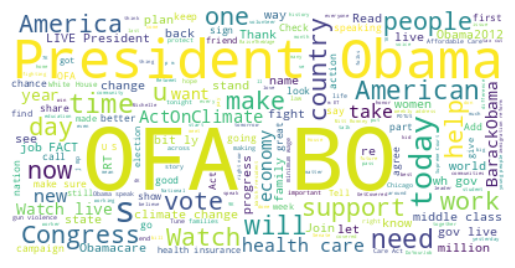

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#rahul

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Persons/rahul.csv')
data = data['Tweet']
data.fillna(" ")
print(data)

0        @JaikyYadav16 इन विकल्पों में से और अभी के समय...
1        @ndtv Rahul Gandhi left congress in the mid ro...
2                               @JaikyYadav16 Rahul Gandhi
3                   rahul Gandhi ji is real hero of india.
4        Rahul Gandhi is getting massive support in And...
                               ...                        
69995    @BharatJSoni @dranupmodgil Ye chunawala 2 kodi...
69996    Even Rahul Gandhi's fiercest critics like myse...
69997    BHATTACHARJEE SHYAMAL: A " PSHYCOPATH " is Rah...
69998    @priyankac19 @MinistryWCD She is cooking 'hate...
69999              @INCIndia Rahul Gandhi video share karo
Name: Tweet, Length: 70000, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[:100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[100:150]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[150:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
print(result)

[ 9.25 34.   56.75]


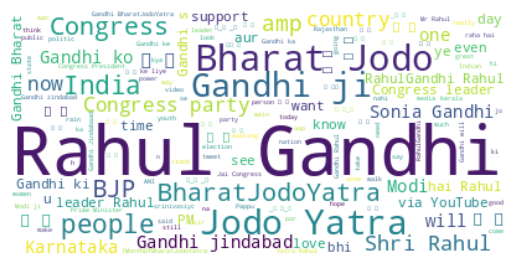

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#entertainment work

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Entertainment/IPL2022.csv')
data = data['text']
data.fillna(" ")
print(data)

<ipython-input-19-9e541ee7201e>:1: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Entertainment/IPL2022.csv')


0         👉World Cricket Baba!👈 Top Countries With the \...
1         How fans of @ViratGang @BoldBrigade @Fanaticso...
2         👉World Cricket Baba!👈 Top Countries With the \...
3         @Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...
4         👉World Cricket Baba!👈 Top Countries With the \...
                                ...                        
574659    2⃣5⃣ Matches 🏏\n1⃣4⃣2⃣0⃣ Runs 🔥\n2⃣ Centuries ...
574660    Tough competition 💪😂\n\n.\n#IPL #BCCI #IPL2022...
574661    Lucknow IPL franchise ropes in MyCircle11 as t...
574662    Official conformation : RPSG's Lucknow IPL Tea...
574663    He believes In basics, and feels sticking to t...
Name: text, Length: 574664, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[1000:1100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[1200:1400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[1600:1700]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10000:10200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10300:10400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)

print(result)

[ 5.09375 24.9375  69.96875]


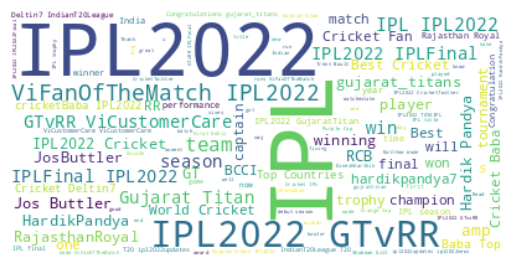

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data[:10000])))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#fifa

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Entertainment/Fifa.csv')
data = data['Tweet']
data.fillna(" ")
print(data)

0        What are we drinking today @TucanTribe \n@MadB...
1        Amazing @CanadaSoccerEN  #WorldCup2022 launch ...
2        Worth reading while watching #WorldCup2022 htt...
3        Golden Maknae shinning bright\n\nhttps://t.co/...
4        If the BBC cares so much about human rights, h...
                               ...                        
22519              Here We go World cup 2022 #WorldCup2022
22520    Anderlecht confirms former Viborg FF's Jesper ...
22521    Great thread to read before the start of #Worl...
22522    Raphinha wants Brazil to be united at the #Wor...
22523    How to buy $SOT on PinkSale?🤔\n\nHave you been...
Name: Tweet, Length: 22524, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[1000:1100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[1200:1400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[1600:1700]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10000:10200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10300:10500]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)

print(result)

[15.53125 38.      46.46875]


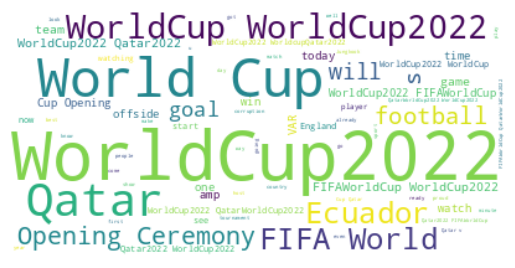

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#ind vs pak

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Entertainment/IndPak.csv')
data = data['text']
data.fillna(" ")
print(data)

0         Hangover of #INDvsPAK2022 is still around. #T2...
1         @TheBarmyArmy luv it \n\n❤️❤️❤️\n\n#INDvPAK \n...
2                                             #INDvsPAK2022
3                                 No ball thi #INDvsPAK2022
4         @mufaddal_vohra @ImRo45 \n@BCCI \n\nWhen will\...
                                ...                        
272265               @imVkohli Use this as a dislike button
272266    @HSajwanization @imVkohli .. and massive #Hear...
272267    @imVkohli Well played king your Father would b...
272268        @imVkohli #GOAT #Kingkohli #Kingisalwaysaking
272269                      @imVkohli Thank you kingggg 🙌🏼💙
Name: text, Length: 272270, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[1000:1100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[1200:1300]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[1600:1700]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10000:10100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10300:10400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)

print(result)

[ 5.125  26.9375 67.9375]


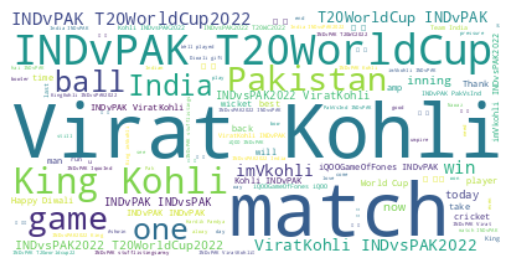

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data[:100000])))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#nba

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Entertainment/NBA.csv')
data = data['text']
data.fillna(" ")
print(data)

0        @NBA The @DetroitPistons could have had @spida...
1        No lies detected.  Shop here https://t.co/hETg...
2        Check out Philadelphia 76ers jacket size 56 Mi...
3        Check out Allen Iverson basketball jersey Sixe...
4        Now on sale, In-Stock.  Officially licensed by...
                               ...                        
98099    My buddy made this for his son’s birthday 💯💯💯....
98100    players on the #HoustonRockets  and #HoustonAs...
98101    I fully support everyone's right to protest ag...
98102    #Nba #HoustonRockets #jamesharden #NBAPlayoffs...
98103    Alberts Saturday Slate  Rockets -5 🔨 Djokovich...
Name: text, Length: 98104, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[1000:1100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[1200:1400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[1600:1700]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10000:10200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10300:10500]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage5 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage5)], axis = 0)

print(result)

[ 6.5     31.15625 62.34375]


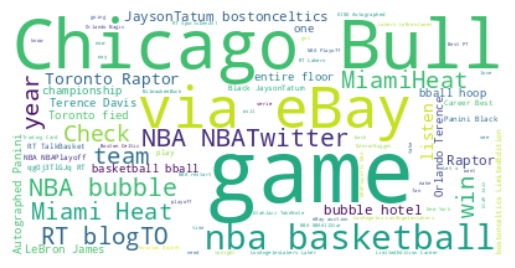

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#avengers

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Entertainment/avengers.csv')
data = data['Review']
data.fillna(" ")
print(data)

0       This review contains spoilers.The Avengers is ...
1       The score, the CGI, the writing, the humor, al...
2       The MCU had estavlished itself as an interesti...
3       This is a great first avenger movie liked it a...
4       The best movie of phase 1! This movie was lite...
                              ...                        
2076    This film in essence is a fan boy film and hit...
2077    The Avengers is one of these rare movies where...
2078    The Avengers is a science fiction film that, o...
2079    The whole movie is easy to understand but outs...
2080    This is the greatest MCU movie I have watched ...
Name: Review, Length: 2081, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[0:50]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[50:100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[100:150]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)

print(result)

[26.   4.5 69.5]


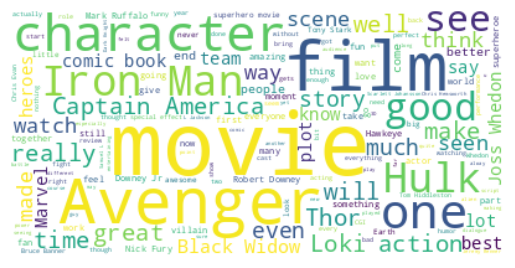

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#darkknight

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Entertainment/darkknight.csv')
data = data['Review']
data.fillna(" ")
print(data)

0       I got to see The Dark Knight on Wednesday nigh...
1       I think that I could wax lyrical but this movi...
2       I think the big question...or the question eve...
3       (Synopsis) Bruce Wayne/Batman (Christian Bale)...
4       Batman has always been my favourite superhero ...
                              ...                        
5440    There is nothing missing from this movie, it's...
5441    Good Movie, I Like This Movie,I Like Bat Man.I...
5442    This is the best comic book movie ever. I have...
5443    The Dark Knight is a good action movie that fe...
5444    The League of Shadows is defeated in Gotham , ...
Name: Review, Length: 5445, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[0:50]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[50:100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[100:150]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)

print(result)

[37.5  3.5 59. ]


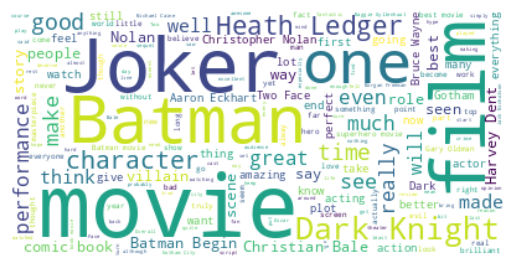

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#jhonwick

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Entertainment/johnwick.csv')
data = data['Review']
data.fillna(" ")
print(data)

0       This franchise has obviously become a parody. ...
1       Assassin John Wick is referred to as Baba Yaga...
2       In the immediate lineage of the second opus, t...
3       John Wick, having killed someone within the sa...
4       It's not that I am not an action fan, one star...
                              ...                        
2411    Guns lot of guns! This is a perfect action mov...
2412    The best action scenes never filmed or imagine...
2413    It's so hard to make a movie with action fight...
2414    Probably the best and funniest John Wick of th...
2415    John Wick series sets a new level for action m...
Name: Review, Length: 2416, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[0:50]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[50:100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[250:300]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[100:150]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
print(result)

[54.5  5.  40.5]


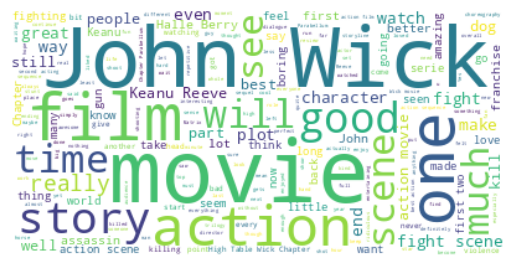

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#joker

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Entertainment/joker.csv')
data = data['Review']
data.fillna(" ")
print(data)

0        There is no doubt that the movie was well thou...
1        Here, we have a broken man whose mental instab...
2        Low expectations and subverted expectations pl...
3        I have just watched the Joker in Venice and I ...
4        In an era of cinema so saturated with superher...
                               ...                        
11352    In love with each and every scene, Life is awe...
11353    JOKER is definitely one of the best films I've...
11354    Grab a seat, free your heart and calm your min...
11355    I have just witnessed a masterpiece of an acti...
11356    Great and atmospheric movie. Interesting story...
Name: Review, Length: 11357, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[0:50]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[50:100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[250:300]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[100:150]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)

print(result)

[28.  2. 70.]


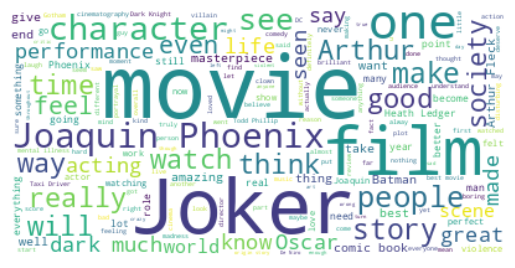

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#kabir

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Entertainment/kabir.csv')
data = data['text']
data.fillna(" ")
print(data)

0         shahidkapoor I am in love with kabir  Kabirsi...
1        That's because you are sweet teddy bear guy an...
2        I’m obsessed with Bekhayali and Kaise Hua  Kab...
3        The character of Kabir needs a psychological t...
4        Advani_Kiara You are such a beautiful.person a...
                               ...                        
12591    KabirSingh NikitaDutta  KiaraAdvani   JiaSharm...
12592    KabirSingh Day 1 crossed 20 cr. Blockbuster op...
12593    KabirSingh shuts down  Bharat . Let's see  Sum...
12594    KabirSingh a film worth watching....The Entry ...
12595     KabirSingh an Adult film, family audience wil...
Name: text, Length: 12596, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[0:50]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[50:100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[250:300]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[100:150]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
print(result)

[14.75 21.75 63.5 ]


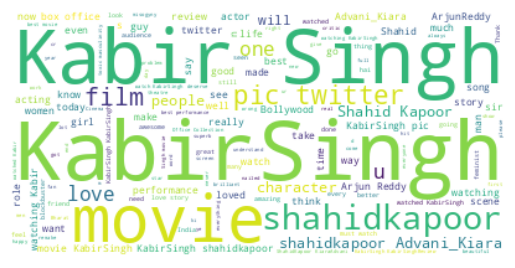

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#morbius

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Entertainment/morbius.csv')
data = data['Review']
data.fillna(" ")
print(data)

0       Movies like Venom and Morbius need to be Rated...
1       "Morbius" is an Action - Adventure movie in wh...
2       Dangerously ill with a rare blood disorder and...
3       Dr Michael Morbius(Jared Leto, playing the rol...
4       Greetings again from the darkness. Trust the s...
                              ...                        
1905    Jared Leto did an great good at portraying Dr....
1906    In the sea of superhero films, this one does n...
1907    When I hear storyline, at least I think of rel...
1908    Hi,The movie was really interesting and pilote...
1909    I actually enjoyedcthe film albeit the post cr...
Name: Review, Length: 1910, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[0:50]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[50:100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[250:300]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[100:150]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
print(result)

[40.75  7.75 51.5 ]


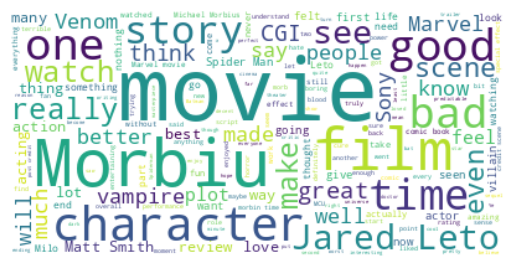

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# nowayhome

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Entertainment/nowayhome.csv')
data = data['Review']
data.fillna(" ")
print(data)

0       This Spiderman is really fantastic. It captiva...
1       Awful movie. The plot sucked and had awful pac...
2       It's hard to discuss this movie and not get in...
3       Review By Kamal KI don't think this film was w...
4       It was very enjoyable to watch in the cinema. ...
                              ...                        
6035    Love what Marvel/Sony just did.Very good idea....
6036    This film is amazing! The best Spider-Man film...
6037    One of the Marvel's masterpiece, Super Excelle...
6038    The originals have always been my fav Spiderma...
6039    This movie feels suprisingly somber for a marv...
Name: Review, Length: 6040, dtype: object


In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[0:50]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[50:100]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[250:300]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [ ]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[100:150]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [ ]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)

print(result)

[20.   5.5 74.5]


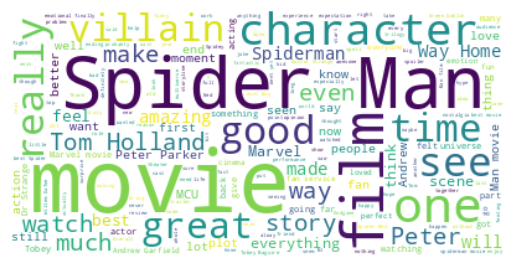

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#topics

In [ ]:
# NASA2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Topics/NASA2.csv')
data = data['Tweet']
data.fillna(" ")
print(data)

0        Here's to you, Oppy. 🥂\n\nBefore you say #Good...
1        Are there rivers and lakes on other worlds? Yo...
2        We want to hear from you!\n\nJoin our series o...
3        The @NASAExoplanets data hint that WASP-39 b, ...
4        .@NASAWebb just scored another first: a full p...
                               ...                        
14105    The supermoon is here! Be sure to bundle up th...
14106    Ever wonder how we track supermoons 🌕 and othe...
14107    A supermoon is coming! Tonight, the full Moon ...
14108    Happy New Year from space! Astronauts aboard t...
14109    ◻ Send a robot to Mars\n◻ Launch @NASA_Astrona...
Name: Tweet, Length: 14110, dtype: object


In [16]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[0:200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [18]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[200:400]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [20]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[500:700]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [19]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10000:10200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [21]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)

print(result)

[ 1.5625 13.5    84.9375]


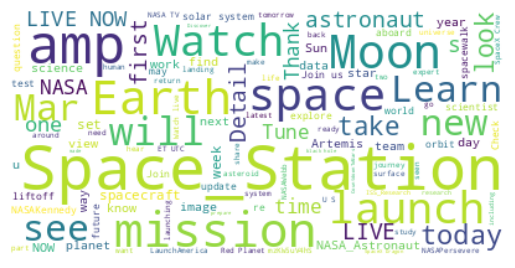

In [22]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# chatgpt

In [23]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Topics/chatgpt.csv')
data = data['text']
data.fillna(" ")
print(data)

0        RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...
1        ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...
2        RT @DarrellLerner: ChatGPT Plugins are the fas...
3        Get an intelligent chatbot for your website in...
4        🔥Hey Guys, #ZenithSwap has launched at just $ ...
                               ...                        
28997                              https://t.co/kdvYoVs8vd
28998    RT @qklxsqf: 📣  chatgpt+NFT港资项目，玩法非常新颖，团队实名，已完...
28999    RT @OACerebro: Guía rápida de la UNESCO. \n\nP...
29000    RT @realSharonZhou: I’m super excited to annou...
29001    It won’t be long now until people quote their ...
Name: text, Length: 29002, dtype: object


In [24]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[0:50]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [25]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[50:250]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [26]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[350:550]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [27]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10000:10200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [28]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)

print(result)

[11.5    62.6875 25.8125]


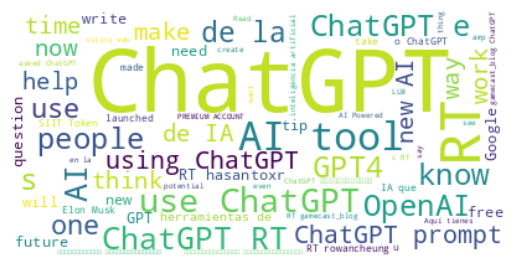

In [29]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# democratic vs republicans

In [30]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Topics/demovsrep.csv')
data = data['Tweet']
data.fillna(" ")
print(data)

0        Today, Senate Dems vote to #SaveTheInternet. P...
1        RT @WinterHavenSun: Winter Haven resident / Al...
2        RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3        RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4        RT @Vegalteno: Hurricane season starts on June...
                               ...                        
86455    Check out my op-ed on need for End Executive O...
86456    Yesterday, Betty &amp; I had a great time lear...
86457    We are forever grateful for the service and sa...
86458    Happy first day of school @CobbSchools! #CobbB...
86459    #Zika fears realized in Florida. House GOP act...
Name: Tweet, Length: 86460, dtype: object


In [31]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[0:50]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [32]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[50:250]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [33]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[350:550]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [34]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10000:10200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [35]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)

print(result)

[ 7.5625 26.6875 65.75  ]


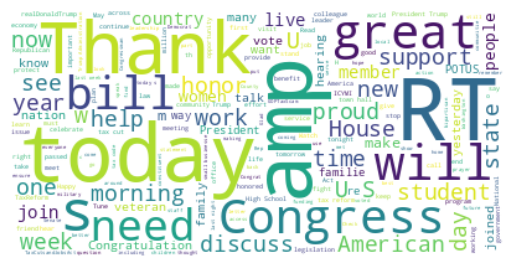

In [36]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# pfizer

In [37]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Topics/pfizer.csv')
data = data['text']
data.fillna(" ")
print(data)

0        Same folks said daikon paste could treat a cyt...
1        While the world has been on the wrong side of ...
2        #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3        Facts are immutable, Senator, even when you're...
4        Explain to me again why we need a vaccine @Bor...
                               ...                        
11015    The number of Covid-19 cases today, 17 Novembe...
11016                        First dose ✅\n#PfizerBioNTech
11017    The number of Covid-19 cases today, 16 Novembe...
11018    #PfizerBioNTech has developed new pill #Paxlov...
11019    The number of Covid-19 cases today, 15 Novembe...
Name: text, Length: 11020, dtype: object


In [38]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[0:50]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [39]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[50:250]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [40]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[350:550]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [41]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10000:10200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [42]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)

print(result)

[16.0625 47.625  36.3125]


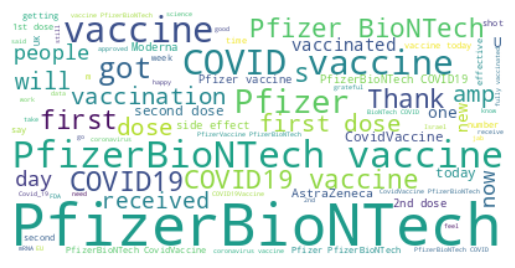

In [43]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# covid 19

In [44]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Topics/covid19.csv')
data = data['text']
data.fillna(" ")
print(data)

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object


In [45]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[0:50]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [46]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[50:250]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [47]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[350:550]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [48]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10000:10200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [49]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)

print(result)

[15.6875 47.     37.3125]


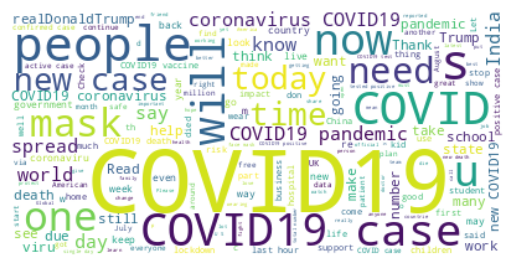

In [50]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")
stopwords.add("amp")

wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# NASA

In [51]:
data = pd.read_csv('/content/drive/MyDrive/DatasetsforSentimentAnalysis/Topics/NASA.csv')
data = data['content']
data.fillna(" ")
print(data)

0        Apollo 17, the most recent mission to land on ...
1        Space news, delivered. 📩\n\nGet weekly updates...
2        How does NASA celebrate the holidays?\n\n@NASA...
3        National Space Council Chair @VP has announced...
4        The newest Earth science satellite lifted off ...
                               ...                        
54378    Aeronautics Essay Competition for Students: A ...
54379    'Death Star' Galaxy Black Hole Fires at Neighb...
54380    NASA's Top Exploration and Discovery Stories o...
54381    Spacecraft Reveals New Insights About the Orig...
54382    Apollo 17: Thirty-five years ago this week on ...
Name: content, Length: 54383, dtype: object


In [52]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[0:50]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage1 = percentagecalc(labelassign(result))

In [53]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[50:250]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage2 = percentagecalc(labelassign(result))

In [54]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[350:550]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage3 = percentagecalc(labelassign(result))

In [55]:
tokenizeddata = tokenizer.batch_encode_plus(list(data[10000:10200]), return_tensors = 'pt', padding = True, truncation = True)
result = predictions(tokenizeddata)
percentage4 = percentagecalc(labelassign(result))

In [56]:
result = np.mean([np.array(percentage1),np.array(percentage2)], axis = 0)
result = np.mean([result,np.array(percentage3)], axis = 0)
result = np.mean([result,np.array(percentage4)], axis = 0)

print(result)

[ 2.25   14.3125 83.4375]


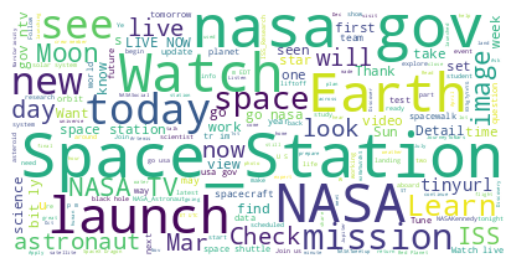

In [57]:
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")
stopwords.add("amp")
wordcloud = WordCloud(stopwords=stopwords, max_font_size = 70, background_color= 'white', contour_width = 3, contour_color= "steelblue").generate(" ".join(list(data)))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()